In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
sales_predict = pd.read_csv('RandomForestWeeklySalesPredictions.csv')

In [31]:
sales_predict.tail()

,Id,Weekly_Sales
115059,45_98_2013-06-28,553.52095
115060,45_98_2013-07-05,22670.47245
115061,45_98_2013-07-12,26899.72495
115062,45_98_2013-07-19,570.77370
115063,45_98_2013-07-26,35186.79695


In [32]:
sales_predict['Id'] = sales_predict['Id'].replace('^.*\_\s*','', regex=True)

In [33]:
sales_predict.head()

,Id,Weekly_Sales
0,2012-11-02,18752.41985
1,2012-11-09,752.15020
2,2012-11-16,326.75630
3,2012-11-23,953.02260
4,2012-11-30,8795.07785


In [34]:
#splitting the date into year, month, and day
def split_dates(df):
    df['Date'] = pd.to_datetime(df['Id'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['Quarter'] = df.Date.dt.quarter
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week) * 1.0
    df = df.drop(columns = ['Id'])
    return df

In [35]:
sales_predict = split_dates(sales_predict)

In [39]:
sales_predict.head()

,Weekly_Sales,Date,Year,Month,Day,Quarter,WeekOfYear
0,18752.41985,2012-11-02,2012,11,2,4,44.0
1,752.15020,2012-11-09,2012,11,9,4,45.0
2,326.75630,2012-11-16,2012,11,16,4,46.0
3,953.02260,2012-11-23,2012,11,23,4,47.0
4,8795.07785,2012-11-30,2012,11,30,4,48.0


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

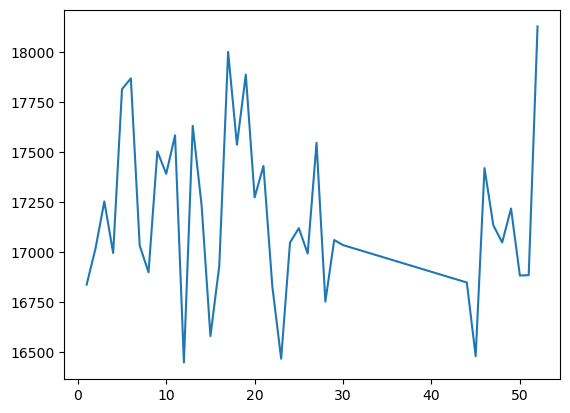

In [37]:
sns.lineplot(data=sales_predict, x='WeekOfYear', y='Weekly_Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over Time')
plt.show()